# Создание карты рестаранов сети Burger King с учётом количества ближайших рестаранов сети KFC 

импорт библиотек

In [54]:
import pandas as pd
import geopandas
import geopy.distance
import matplotlib.pyplot as plt

датасет для burgerking,
источник: https://burgerking.ru/restaurant-locations-json-reply-new/

In [55]:
table1 = pd.read_json("https://burgerking.ru/restaurant-locations-json-reply-new/")
data_bk = pd.DataFrame(table1)
data_bk

,storeId,latitude,longitude,closed,premium
0,48,50.632401,36.571400,0,0
1,121,53.378700,58.981602,0,0
2,231,55.790255,37.679944,0,0
3,232,55.756184,37.615438,0,0
4,233,55.770393,37.620663,0,0
...,...,...,...,...,...
747,909,55.780588,37.667348,1,0
748,910,56.852933,35.907664,1,0
749,913,56.315701,43.992252,0,0
750,914,57.786957,40.920807,0,0


удаление ненужных для данного проекта столбцов

In [56]:
data_bk.drop(['closed', 'premium'], axis = 1, inplace = True)

для датасета KFC приходится в ручную выбрать необходимые колонки, содержащие id и координаты каждого ресторана, источник: https://kfs-menu.ru/json/json.php?citi=moskva

In [57]:
table2 = pd.read_json("https://kfs-menu.ru/json/json.php?citi=moskva")
data2 = [[], []]
for i in table2['features']:
    data2[0].append(i['id'])
    data2[1].append(i['geometry']['coordinates'])
data_kfc = pd.DataFrame(data2).T
data_kfc

,0,1
0,138,"[55.912642, 37.571646]"
1,256,"[55.75577, 37.614565999999996]"
2,257,"[55.773522, 37.656465]"
3,258,"[55.769994, 37.596458]"
4,259,"[55.729777, 37.640282]"
...,...,...
156,414,"[55.810815, 37.383253]"
157,415,"[55.604533, 37.490089]"
158,416,"[55.857579, 37.394242]"
159,482,"[55.982723, 37.174831]"


переименование колонок

In [58]:
data_kfc.rename(columns = {0: "storeID", 1: "coordinates"}, inplace = True)

In [59]:
data_kfc

,storeID,coordinates
0,138,"[55.912642, 37.571646]"
1,256,"[55.75577, 37.614565999999996]"
2,257,"[55.773522, 37.656465]"
3,258,"[55.769994, 37.596458]"
4,259,"[55.729777, 37.640282]"
...,...,...
156,414,"[55.810815, 37.383253]"
157,415,"[55.604533, 37.490089]"
158,416,"[55.857579, 37.394242]"
159,482,"[55.982723, 37.174831]"


разбивка колонки с координатами на отдельные составляющие (широту и долготу)

In [60]:
data_kfc['latitude'] = data_kfc.coordinates.apply(lambda x: x[0])
data_kfc['longitude'] = data_kfc.coordinates.apply(lambda x: x[1])
data_kfc.drop('coordinates', inplace = True, axis = 1)
data_kfc

,storeID,latitude,longitude
0,138,55.912642,37.571646
1,256,55.755770,37.614566
2,257,55.773522,37.656465
3,258,55.769994,37.596458
4,259,55.729777,37.640282
...,...,...,...
156,414,55.810815,37.383253
157,415,55.604533,37.490089
158,416,55.857579,37.394242
159,482,55.982723,37.174831


получение геодатафрейма для рестаранов burger king

In [61]:
gdf_bk = geopandas.GeoDataFrame(
    data_bk, geometry=geopandas.points_from_xy(data_bk.longitude, data_bk.latitude))

In [62]:
print(gdf_bk.head())

   storeId   latitude  longitude                   geometry
0       48  50.632401  36.571400  POINT (36.57140 50.63240)
1      121  53.378700  58.981602  POINT (58.98160 53.37870)
2      231  55.790255  37.679944  POINT (37.67994 55.79026)
3      232  55.756184  37.615438  POINT (37.61544 55.75618)
4      233  55.770393  37.620663  POINT (37.62066 55.77039)


построение карты Москвы

In [63]:
mo_gdf = geopandas.read_file('moscow_adm.shp')

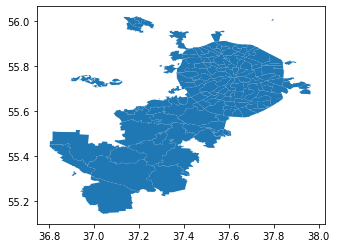

In [64]:
mo_gdf.plot()

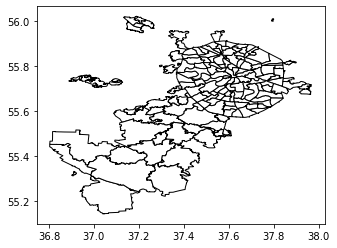

In [65]:
ax = mo_gdf.plot(
    color='white', edgecolor='black')

отображение рестаранов сети burger king на карте Москвы

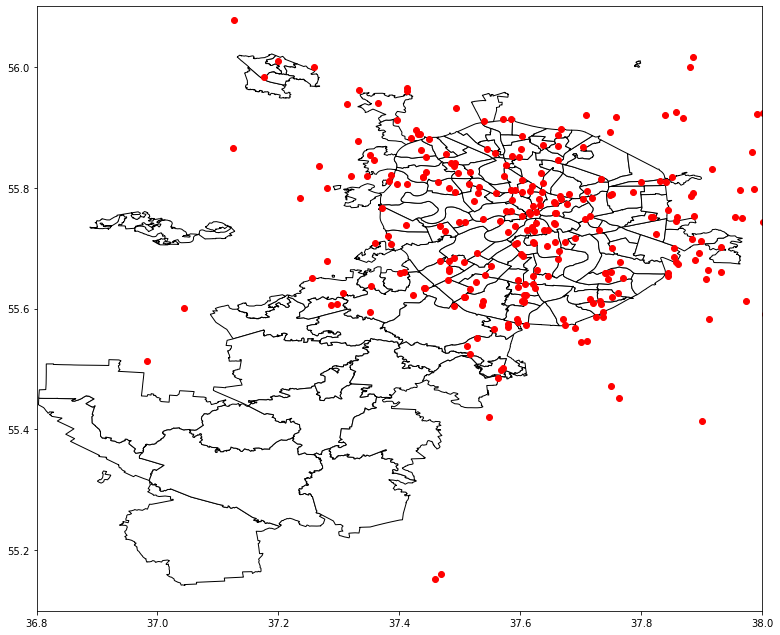

In [66]:
ax = mo_gdf.plot(
    color='white', edgecolor='black', figsize = [13, 13])
gdf_bk.plot(ax=ax, color='red')
ax.set_xlim(36.8, 38)
ax.set_ylim(55.1, 56.1)
plt.show()

получение геодатафрейма для рестаранов kfc

In [67]:
gdf_kfc = geopandas.GeoDataFrame(
    data_kfc, geometry=geopandas.points_from_xy(data_kfc.longitude, data_kfc.latitude))

In [68]:
print(gdf_bk.head())

   storeId   latitude  longitude                   geometry
0       48  50.632401  36.571400  POINT (36.57140 50.63240)
1      121  53.378700  58.981602  POINT (58.98160 53.37870)
2      231  55.790255  37.679944  POINT (37.67994 55.79026)
3      232  55.756184  37.615438  POINT (37.61544 55.75618)
4      233  55.770393  37.620663  POINT (37.62066 55.77039)


отображение рестаранов сети kfc на карте Москвы

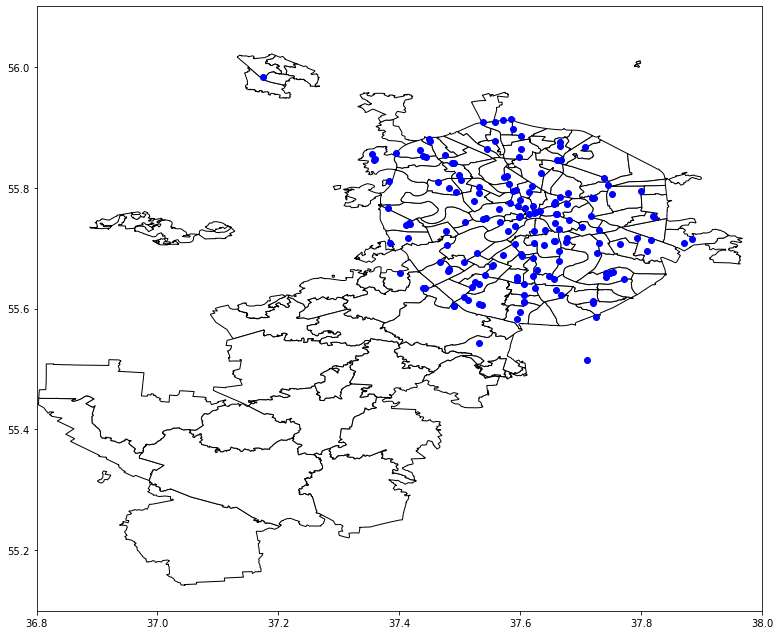

In [69]:
ax = mo_gdf.plot(
    color='white', edgecolor='black', figsize = [13, 13])
gdf_kfc.plot(ax=ax, color='blue')
ax.set_xlim(36.8, 38)
ax.set_ylim(55.1, 56.1)
plt.show()

оставим только те рестораны, которые лежат в Москве или её окрестностях (условно)  

In [71]:
gdf_bk = gdf_bk[gdf_bk.longitude.between(36.8, 38) & gdf_bk.latitude.between(55.1, 56.1)]
gdf_bk

,storeId,latitude,longitude,geometry
2,231,55.790255,37.679944,POINT (37.67994 55.79026)
3,232,55.756184,37.615438,POINT (37.61544 55.75618)
4,233,55.770393,37.620663,POINT (37.62066 55.77039)
5,234,55.729675,37.611285,POINT (37.61128 55.72968)
6,235,55.808225,37.638000,POINT (37.63800 55.80823)
...,...,...,...,...
711,873,55.840859,37.485214,POINT (37.48521 55.84086)
722,884,55.687051,37.603918,POINT (37.60392 55.68705)
731,893,55.790631,37.886060,POINT (37.88606 55.79063)
745,907,55.791580,37.560329,POINT (37.56033 55.79158)


In [72]:
gdf_kfc = gdf_kfc[gdf_kfc.longitude.between(36.7, 37.9) & gdf_kfc.latitude.between(55.1, 56.1)]
gdf_kfc

,storeID,latitude,longitude,geometry
0,138,55.912642,37.571646,POINT (37.57165 55.91264)
1,256,55.755770,37.614566,POINT (37.61457 55.75577)
2,257,55.773522,37.656465,POINT (37.65646 55.77352)
3,258,55.769994,37.596458,POINT (37.59646 55.76999)
4,259,55.729777,37.640282,POINT (37.64028 55.72978)
...,...,...,...,...
156,414,55.810815,37.383253,POINT (37.38325 55.81081)
157,415,55.604533,37.490089,POINT (37.49009 55.60453)
158,416,55.857579,37.394242,POINT (37.39424 55.85758)
159,482,55.982723,37.174831,POINT (37.17483 55.98272)


создание датасета на основе датасета burger king для построения карты, в который позже будет добавлена новая колонка, содержащая данные о числе конкурентов в радиусе 2 км

In [73]:
gdf_compt = gdf_bk.copy()
gdf_compt

,storeId,latitude,longitude,geometry
2,231,55.790255,37.679944,POINT (37.67994 55.79026)
3,232,55.756184,37.615438,POINT (37.61544 55.75618)
4,233,55.770393,37.620663,POINT (37.62066 55.77039)
5,234,55.729675,37.611285,POINT (37.61128 55.72968)
6,235,55.808225,37.638000,POINT (37.63800 55.80823)
...,...,...,...,...
711,873,55.840859,37.485214,POINT (37.48521 55.84086)
722,884,55.687051,37.603918,POINT (37.60392 55.68705)
731,893,55.790631,37.886060,POINT (37.88606 55.79063)
745,907,55.791580,37.560329,POINT (37.56033 55.79158)


метод для определения числа конкурентов. Циклически перебираются каждые координаты ресторана kfc для каждых координат ресторана burger king  и находится расстояние между ними при помощи функционала geopy. Если полученное растояние не превышает 2 км, счётчик инкрементируется на единицу

In [74]:
def get_distance(k):
    num = 0
    for i in gdf_kfc.geometry:
        if geopy.distance.geodesic((k.x, k.y), (i.x, i.y)).km < 2:
            num +=1
    return num

создание новой колонки, отображающей количество конкурентов в радиусе 2 км

In [75]:
gdf_compt['competitors'] = gdf_compt.geometry.apply(get_distance)
gdf_compt

,storeId,latitude,longitude,geometry,competitors
2,231,55.790255,37.679944,POINT (37.67994 55.79026),3
3,232,55.756184,37.615438,POINT (37.61544 55.75618),8
4,233,55.770393,37.620663,POINT (37.62066 55.77039),6
5,234,55.729675,37.611285,POINT (37.61128 55.72968),1
6,235,55.808225,37.638000,POINT (37.63800 55.80823),1
...,...,...,...,...,...
711,873,55.840859,37.485214,POINT (37.48521 55.84086),3
722,884,55.687051,37.603918,POINT (37.60392 55.68705),3
731,893,55.790631,37.886060,POINT (37.88606 55.79063),0
745,907,55.791580,37.560329,POINT (37.56033 55.79158),0


узнаем, какие результаты получились

In [76]:
gdf_compt['competitors'].unique()

array([3, 8, 6, 1, 4, 5, 2, 0, 7], dtype=int64)

создание метода для определения цвета точек в зависимости от числа конкурентов

In [77]:
def get_color(x):
    colors = {
        0: 'grey',
        1: 'olive',
        2: 'red',
        3: 'orange',
        4: 'yellow',
        5: 'green',
        6: 'cyan',
        7: 'blue',
        8: 'purple',
    }
    return colors.get(x, 'grey')

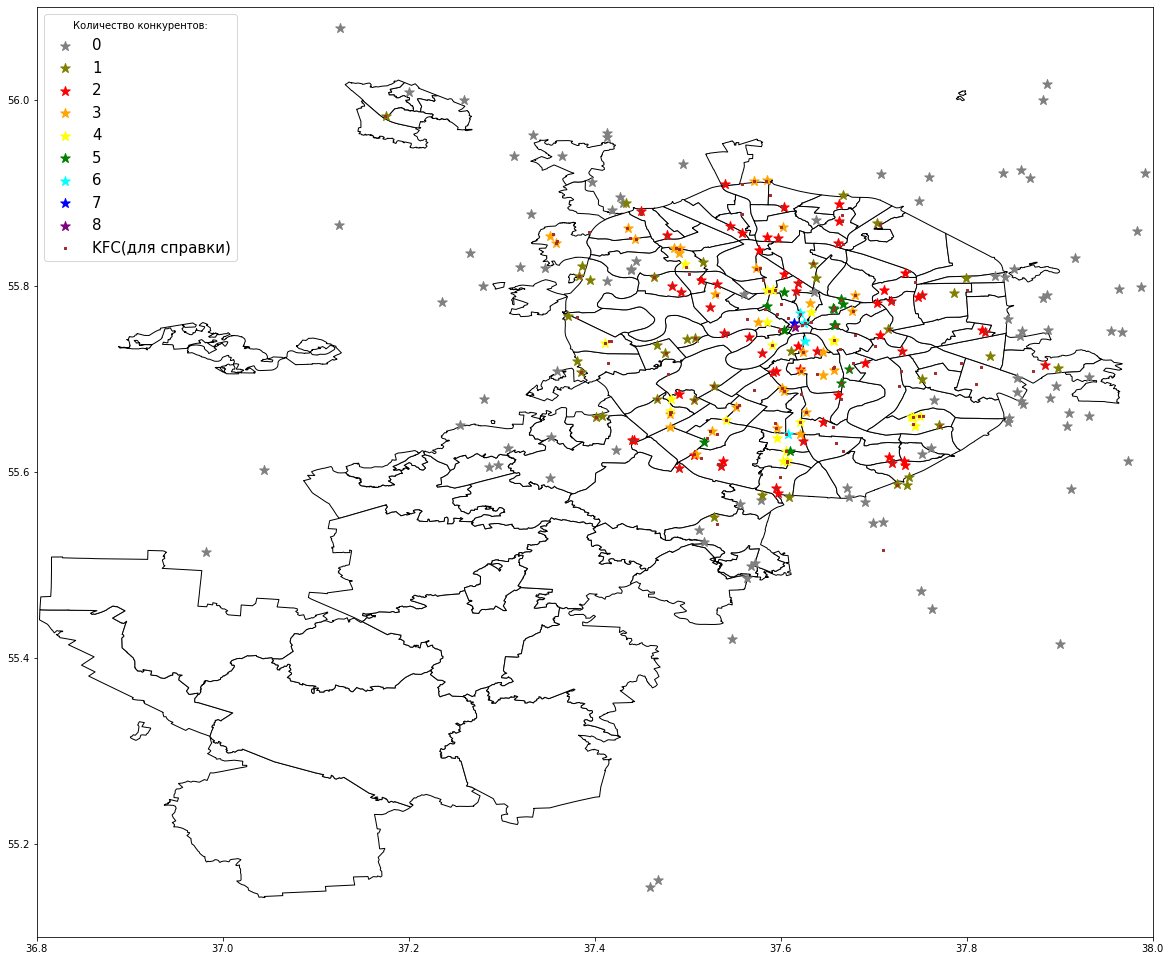

In [99]:
ax = mo_gdf.plot(
    color='white', edgecolor='black', figsize = [20, 20])
for i in range(9):
    gdf_compt[gdf_compt.competitors == i].plot(ax=ax, color = get_color(i), marker = '*', markersize = 100)
gdf_kfc.plot(ax=ax, color='brown', marker = 's', markersize = 8)
ax.set_xlim(36.8, 38)
ax.set_ylim(55.1, 56.1)
ax.legend((0, 1, 2, 3, 4, 5, 6, 7, 8, 'KFC(для справки)'), loc = 2, fontsize = 15, title = 'Количество конкурентов:')
plt.show()

как видно на полученной карте, у ресторанов Вurger Кing почти нет конкурентов за пределами МКАДа (либо нет данных о расположении KFC за МКАДом, что вероятнее). Внутри МКАДа, но за пределами ТТК, по большей части, мало конкурентов (1-4). В пределах ТТК расположено большинство ресторанов с 5 и более конкурентами. Ну и наконец, в центре Москвы есть по одному ресторану с 7 и 8 конкурентами. Что, в приципе, и логично